# (연습) 2차원 데이터

**준비사항**

Numpy와 Pandas 라이브러리를 각각 np와 pd라는 별칭으로 불러온다

In [1]:
import numpy as np
import pandas as pd

`matplotlib.pyplot`은 막대그래프, 히스토그램, 산점도 등 데이터를 그래프로 시각화할 때 필요한
다양한 함수를 제공하는 모듈이다.

In [2]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.rc('figure', figsize=(10, 6))  # 그래프 크기 지정

**데이터 저장소 디렉토리**

코드에 사용되는 데이터 저장소의 기본 디렉토리를 지정한다.

In [3]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**문제 1**

기본 데이터 저장소에 있는 `sc_weir.csv` 파일은
광주광력시에서부터 전라남도 나주를 거쳐 서해까지 이어지는 영산강에 설치된 승촌보에서 측정한 
두 종류의 데이터를 담고 있다.

- `Chl-a`: 녹조 발생의 주요 요인인 클로로필-A의 수치 100개
- `Discharge`: 보에서 방출되는 시간당 방류량 수치 100개

클로로필-A 농도가 높을 수록 수질(water quality)이 나빠지며, 방류량이 많을 수록 클로로필-A 농도는 일반적으로 떨어지며,
두 데이터 사이의 상관관계를 확인하기 위해 수집되었다.

In [4]:
sc_weir_df = pd.read_csv(data_url+'sc_weir.csv')
sc_weir_df

,Chl-a,Discharge
0,51,25
1,51,25
2,53,24
3,53,24
4,54,22
...,...,...
95,122,9
96,122,9
97,124,49
98,125,9


항목만으로 구성된 넘파이 어레이를 선언한다.

In [5]:
sc_weir_arr = sc_weir_df.values
sc_weir_arr.shape

(100, 2)

두 데이터를 별도의 어레이로 지정한다.

In [6]:
chl_a_arr = sc_weir_arr[:, 0]
discharge_arr = sc_weir_arr[:, 1]

(1) 클로로필-A와 시간당 방류량 사이의 공분산을 계산하고 두 데이터 사이의 상관관계를 설명하라.

- 넘파이 활용

In [7]:
np.cov(chl_a_arr, discharge_arr)

array([[511.91959596, -66.88868687],
       [-66.88868687,  40.6920202 ]])

- 데이터프레임 활용

In [8]:
sc_weir_df.cov()

,Chl-a,Discharge
Chl-a,511.919596,-66.888687
Discharge,-66.888687,40.692020


(2) 클로로필-A와 시간당 방류량 사이의 피어슨 상관계수를 계산하고 두 데이터 사이의 선형 상관관계를 설명하라.

- 넘파이 활용

In [9]:
np.corrcoef(chl_a_arr, discharge_arr)

array([[ 1.       , -0.4634439],
       [-0.4634439,  1.       ]])

- 데이터프레임 활용

In [10]:
sc_weir_df.corr()

,Chl-a,Discharge
Chl-a,1.000000,-0.463444
Discharge,-0.463444,1.000000


(3) x-축을 방류량, y-축을 클로로필-A 수치로 지정한 다음 산점도를 그린다.

- 넘파이 활용

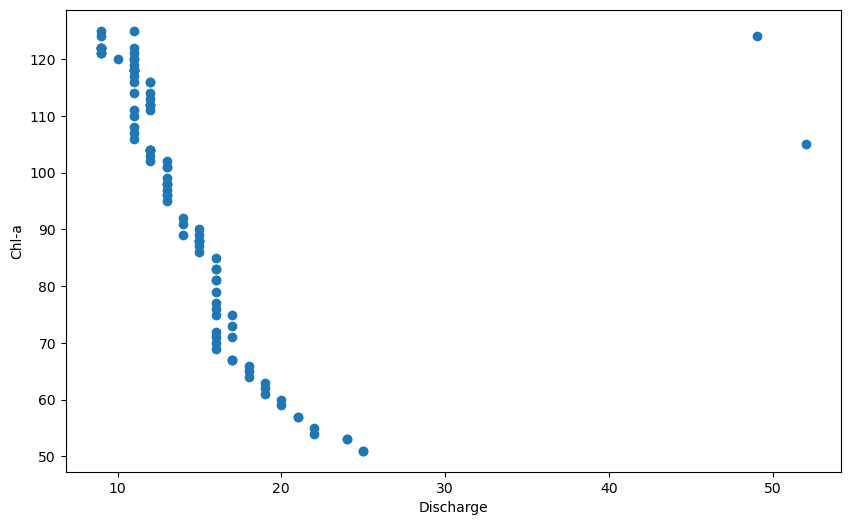

In [11]:
plt.scatter(discharge_arr, chl_a_arr)

# 그래프 설정
plt.xlabel("Discharge")
plt.ylabel("Chl-a")    
plt.show()

- 데이터프레임 활용

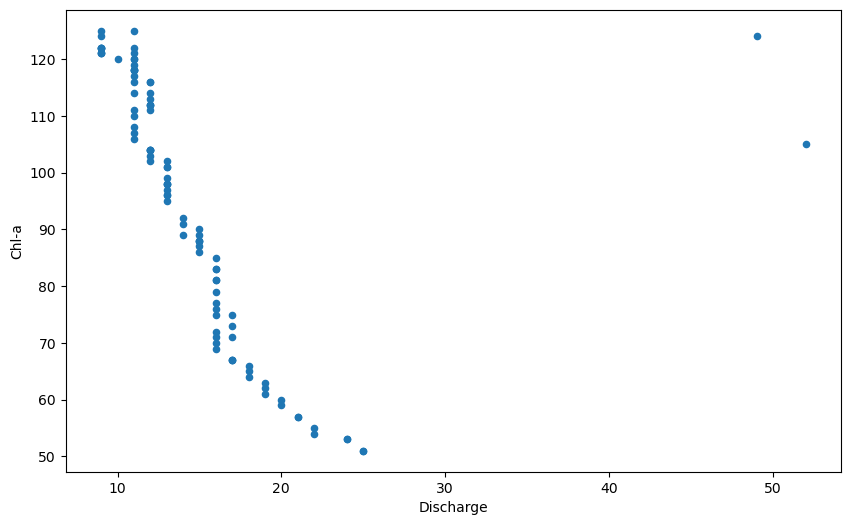

In [12]:
sc_weir_df.plot.scatter('Discharge', 'Chl-a')

# 그래프 설정
plt.xlabel("Discharge")           # x축 눈금 설명
plt.ylabel("Chl-a")       # y축 눈금 설명
plt.show()

(4) 위 산점도에 따르면 두 개의 이상치가 존재한다.
어떤 데이터가 이상치인지 설명하라.

답:

- 산점도 오른쪽 상단에 위치한 두 점이 이상치로 보인다.

- 이유: 두 점을 제외하면 방류량이 많아질 수록 클로리필-A 농도가 떨어진다. 
    하지만 두 점은 방류량이 무엇보다도 높지만 클로리필-A 농도가 매우 높다.

(5) 클로로필-A 데이터와 방수량 두 데이터셋 모두에서 이상치에 해당하는 두 개의 값을 제거한다.

- 넘파이 활용

In [13]:
np.sort(discharge_arr)

array([ 9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18,
       19, 19, 19, 20, 20, 21, 21, 22, 22, 24, 24, 25, 25, 49, 52])

두 개의 이상치가 49와 52로 확인된다.
그리고 두 숫자는 한 번씩만 사용되었다.
두 이상치를 제거하려면 해당 인덱스를 알아야 한다.
가능하긴 한데 조금 복잡하다.
나중에 고급 인덱싱 기법을 배우면 어렵지 않게 처리할 수 있다.

따라서 여기서는 데이터프레임을 이용하는 것으로 넘어간다.

- 데이터프레임 활용

힌트: 데이터프레임의 `sort_values()` 메서드 활용

In [14]:
sc_weir_df.sort_values('Discharge')

,Chl-a,Discharge
99,124,9
98,125,9
95,122,9
94,122,9
91,121,9
...,...,...
2,53,24
1,51,25
0,51,25
97,124,49


두 개의 이상치의 인덱스가 97과 62로 확인된다.
따라서 두 이상치를 `drop()` 메서드로 삭제한다.
데이터 크기가 98로 줄어든다.

In [15]:
no_outlier = sc_weir_df.drop([62, 97], axis=0)
no_outlier.shape

(98, 2)

(6) 이상치를 제거한 두 데이터셋을 이용하여 산점도를 다시 그려본다.

- 데이터프레임 활용

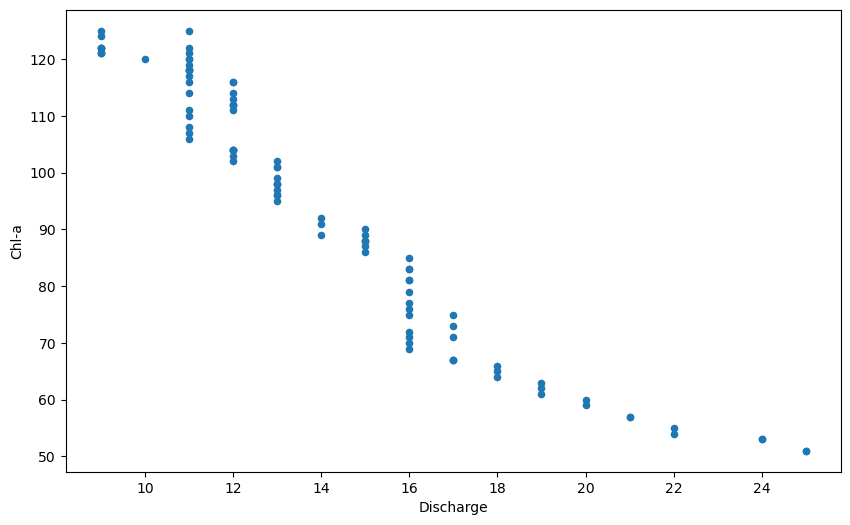

In [16]:
no_outlier.plot.scatter('Discharge', 'Chl-a')

# 그래프 설정
plt.xlabel("Discharge")           # x축 눈금 설명
plt.ylabel("Chl-a")       # y축 눈금 설명
plt.show()

(7) 이상치를 제거하기 이전과 이후의 데이터셋을 이용하여 방류량과 관련하여 아래 값들이 어떻게 달라졌는지 확인한다.
단, 공분산과 피어슨 상관계수는 클로로필-A 데이터와 관련해서 계산한다.

- 평균값
- 중앙값
- 최빈값
- 범위
- 사분범위
- 분산
- 표준편차
- 공분산
- 피어슨 상관계수

힌트: 데이터프레임만 활용

답:

- 평균값

이상치 제거 전:

In [17]:
desc_sc = sc_weir_df['Discharge'].describe()
desc_sc

count    100.00000
mean      14.93000
std        6.37903
min        9.00000
25%       11.00000
50%       13.00000
75%       16.00000
max       52.00000
Name: Discharge, dtype: float64

In [18]:
desc_sc['mean']

14.93

이상치 제거 후: 모두 조금씩 작아짐. 큰 쪽의 이상치가 제거되는 경우 일반적으로 작아짐.

In [19]:
desc_no = no_outlier['Discharge'].describe()
desc_no

count    98.000000
mean     14.204082
std       3.855533
min       9.000000
25%      11.000000
50%      13.000000
75%      16.000000
max      25.000000
Name: Discharge, dtype: float64

In [20]:
desc_no['mean']

14.204081632653061

- 중앙값

이상치 제거 전:

In [21]:
desc_sc['50%']

13.0

이상치 제거 후: 변하지 않음. 변하더라도 아주 조금 달라짐. 중앙값은 이상치에 민감하지 않음.

In [22]:
desc_no['50%']

13.0

- 최빈값

이상치 제거 전:

In [23]:
sc_weir_df['Discharge'].mode()

0    11
Name: Discharge, dtype: int64

이상치 제거 후: 변동 없음. 일반적으로 이상치가 최빈값에 영향을 주지 못함.

In [24]:
no_outlier['Discharge'].mode()

0    11
Name: Discharge, dtype: int64

- 범위

이상치 제거 전:

In [25]:
desc_sc['max'] - desc_sc['min']

43.0

이상치 제거 후: 범위는 무조건 크게 줄어든다.

In [26]:
desc_no['max'] - desc_no['min']

16.0

- 사분범위

이상치 제거 전:

In [27]:
desc_sc['75%'] - desc_sc['25%']

5.0

이상치 제거 후: 변하지 않거나 별로 줄어들지 않음. 즉 사분범위는 이상치에 민감하지 않음.

In [28]:
desc_no['75%'] - desc_no['25%']

5.0

- 분산

이상치 제거 전:

In [29]:
sc_weir_df['Discharge'].var(ddof=0)

40.2851

이상치 제거 후: 분산이 많이 작아진다. 이상치 제거후에 일반적으로 벌어지는 현상임.

In [30]:
no_outlier['Discharge'].var(ddof=0)

14.713452728029981

- 표준편차

이상치 제거 전:

In [31]:
sc_weir_df['Discharge'].std(ddof=0)

6.34705443493279

이상치 제거 후: 분산과 동일하게 변한다.

In [32]:
no_outlier['Discharge'].std(ddof=0)

3.835811873388733

- 공분산: 방류량과 클로로필-A 사이의 공분산

이상치 제거 전: 두 데이터의 공분산은 -66.9 정도로 음의 상관관계다. 즉, 서로 다른 방향으로 움직인다.

In [33]:
sc_weir_df.cov()

,Chl-a,Discharge
Chl-a,511.919596,-66.888687
Discharge,-66.888687,40.692020


이상치 제거 후: -83.4 정도로 음의 상관관계가 커졌다. 즉, 서로 반대 방향으로 움직이는 선형 관계가 더우 커졌다.

In [34]:
no_outlier.cov()

,Chl-a,Discharge
Chl-a,511.650852,-83.420366
Discharge,-83.420366,14.865138


- 피어슨 상관계수: 방류량과 클로로필-A 사이의 피어슨 상관계수

이상치 제거 전: 두 데이터의 피어슨 상관계수은 -0.46 정도로 음의 상관관계가 꽤 큰 편이다.

In [35]:
sc_weir_df.corr()

,Chl-a,Discharge
Chl-a,1.000000,-0.463444
Discharge,-0.463444,1.000000


이상치 제거 후: -0.96 정도로 음의 상관관계가 -1에 매우 가깝다.
즉 두 데이터의 음의 선형관계가 절대적임을 알 수 있다.

In [36]:
no_outlier.corr()

,Chl-a,Discharge
Chl-a,1.000000,-0.956535
Discharge,-0.956535,1.000000


**문제 2**

기본 데이터 저장소에 있는 `california_housing.csv` 파일은 미국 캘리포니아 주의 주택 정보를 담고 있다.
위 파일의 내용을 데이터프레임으로 불러와서 `housing_df` 변수에 할당한다.

In [37]:
housing_df = pd.read_csv(data_url+"california_housing.csv")
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


(1) 주택중위가격(median_house_value) 특성과 다른 수치형 특성 사이의 선형 상관계수를 나타내는 상관계수를 확인하라.

먼저 범주형 특성이 하나 있음을 확인한다.
아래 코드의 실행결과에서 `ocean_proximity` 특성의 `Dtype`이 `object`로 되어 있기에 범주형 특성이다.

In [38]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


따라서 범주형 특성을 제외한 나머지만으로 구성된 데이터프레임을 지정한다.
이를 위해 여기서는 `iloc` 메서드를 이용한다. 
이유는 `ocean_proximity` 특성이 오른쪽 맨끝에 자리하기 때문이다.
물론 다른 다양한 방식도 가능하다.

In [39]:
numeric_df = housing_df.iloc[:, :-1].copy()
numeric_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


연습을 위해 항목만 갖는 어레이도 지정한다.

In [40]:
numeric_arr = numeric_df.values

이제 상관계수를 계산한다.

- 넘파이 활용:
    - `np.corrcoef() 함수의 `rowvar` 키워드 인자의 값을 `False`로 설정해야 함.
        그렇지 않으면 행 사이의, 즉, 데이터 샘플들 사이의 상관계수를 계산하여 (20640, 20640) 모양의 어레이가 생성됨.            
    - 총 9개의 특성들 사이의 상관계수를 담은 (9, 9) 모양의 어레이가 생성됨.

In [41]:
np.corrcoef(numeric_arr, rowvar=False)

array([[ 1.        , -0.92466443, -0.10819681,  0.04456798,         nan,
         0.09977322,  0.05531009, -0.01517587, -0.04596662],
       [-0.92466443,  1.        ,  0.01117267, -0.0360996 ,         nan,
        -0.10878475, -0.07103543, -0.07980913, -0.14416028],
       [-0.10819681,  0.01117267,  1.        , -0.3612622 ,         nan,
        -0.29624424, -0.30291601, -0.11903399,  0.10562341],
       [ 0.04456798, -0.0360996 , -0.3612622 ,  1.        ,         nan,
         0.85712597,  0.91848449,  0.19804965,  0.13415311],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan],
       [ 0.09977322, -0.10878475, -0.29624424,  0.85712597,         nan,
         1.        ,  0.90722227,  0.00483435, -0.02464968],
       [ 0.05531009, -0.07103543, -0.30291601,  0.91848449,         nan,
         0.90722227,  1.        ,  0.01303305,  0.06584265],
       [-0.01517587, -0.07980913, -0.11903399,  0.19804965,   

- 데이터프레임 활용

In [42]:
corr_df = numeric_df.corr()
corr_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


`median_house_value`를 기준으로 하는 상관계수는 다음과 같다.

In [43]:
corr_df.loc['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

(2) 확인된 상관계수를 바탕으로 주택중위가격과 가장 상관관계가 높은 특성을 확인하고 그 이유를 추정하라.

힌트: `sort_values()` 메서드 활용

상관계수를 기준으로 내림차순으로 정렬한다.

In [44]:
corr_df.loc['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

그러면 주택중위가격 자신을 제외하고 가장 높은 선형 상관관계는 중위소득(`median_income`)과 갖는다.
상관계수는 0.688이다.
이 결과는 매우 상식적이다. 이유는 소득이 많을 수록 좋고 비싼 집에 사는 경향이 일반적이기 때문이다.